# 1st Check balance

Text(0, 0.5, 'Observation Counts')

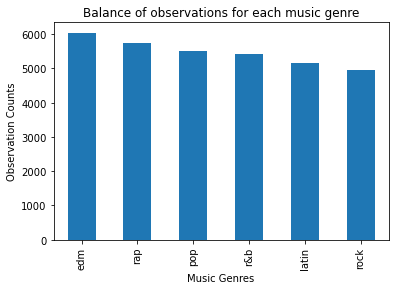

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

spotify = pd.read_csv(
    "/Users/clarissaache/Documents/IDS 705 ML/ml-project/00 raw data/spotify_songs.csv"
)
spotify.head()

spotify["playlist_genre"].value_counts().plot(
    kind="bar", title="Balance of observations for each music genre"
)
plt.xlabel("Music Genres")
plt.ylabel("Observation Counts")

# 2nd, Distributions of covariates for each class
(note there are 12 covariates)

In [63]:
music_covariates = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

other_covariates = ['track_album_name', 'track_name', 'track_artist']
# Do we want to use these?
spotify.sample(4)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
29316,0bxIveXLEDuH8W9fQL9xap,Tsunami,DVBBS,34,7q4BBfHikW3y7CvjQK3QGL,Tsunami,2013-09-07,Big Room House,7vJOXFe40axY7qS39vGDyH,edm,...,4,-5.353,0,0.0481,0.0483,0.655000,0.0897,0.264,128.026,236706
25113,1U5rJXcvCZmpy3apIwoIQv,Mercedes Boy - Single Remix Version,Pebbles,0,5hhZNNh67rpmpmjUfYGKaS,Gold - '80s Soul,2006-01-01,1987-1997 OLD SKOOL JAMZ,0WicovBbxeB0nvQC6IfuaT,r&b,...,10,-7.075,0,0.0568,0.0335,0.021100,0.0636,0.968,114.905,235013
691,6RyuoOJXNzlVWpfC5xQyeI,Alocao (With Bad Gyal),Omar Montes,82,6pEhppkTzrKKGkQw4fNqOD,Alocao (With Bad Gyal),2019-10-24,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,11,-4.705,0,0.0567,0.2140,0.000002,0.1060,0.699,178.005,209320
16152,6CK4xXnpKHJQA4YFoQ6Ads,Why Can't This Be Love - 2004 Remaster,Van Halen,40,4RJcoQhc3aupccH9YnZ69o,The Very Best of Van Halen (UK Release),2004,Hard Rock Classics 1967-1991 (Party Edition),1NIX36ZFWEtgXSbSNghoue,rock,...,7,-5.255,1,0.0977,0.0512,0.000000,0.0835,0.550,88.469,228333


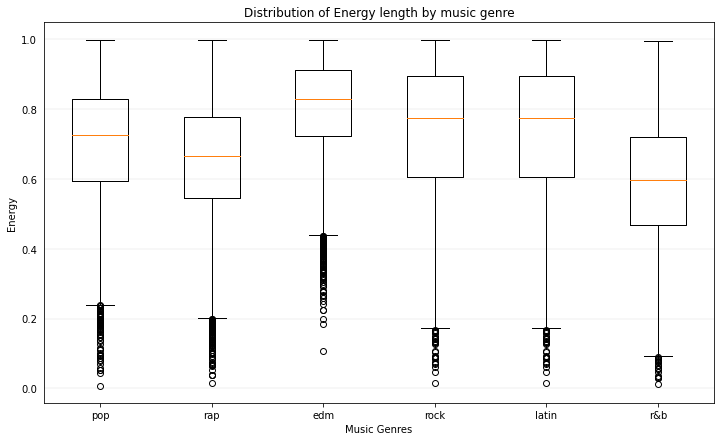

In [16]:
genres = ["pop", "rap", "edm", "rock", "latin", "r&b"]

# Prepare energy by genre datasets
pop_energy = spotify[spotify["playlist_genre"] == "pop"]["energy"]
rap_energy = spotify[spotify["playlist_genre"] == "rap"]["energy"]
edm_energy = spotify[spotify["playlist_genre"] == "edm"]["energy"]
rock_energy = spotify[spotify["playlist_genre"] == "rock"]["energy"]
latin_energy = spotify[spotify["playlist_genre"] == "rock"]["energy"]
rnb_energy = spotify[spotify["playlist_genre"] == "r&b"]["energy"]

# Visualize 
fig, ax = plt.subplots(figsize=(12, 7))

# Remove y-axis tick marks
ax.yaxis.set_ticks_position("none")
# Add major gridlines in the y-axis
ax.grid(color="grey", axis="y", linestyle="-", linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title("Distribution of Energy length by music genre")
plt.xlabel("Music Genres")
plt.ylabel("Energy")
# Set names as labels for the boxplot
dataset = [pop_energy, rap_energy, edm_energy, rock_energy, latin_energy, rnb_energy]
labels = spotify["playlist_genre"].unique()
ax.boxplot(dataset, labels=genres)
plt.show()

In [17]:
# we do these for each covariate...

In [18]:
music_X = spotify[music_covariates]
music_Y = spotify['playlist_genre']
#subset for music covariates only
music_X.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
19466,0.659,0.880,2,-4.254,1,0.0595,0.0383,0.176000,0.1020,0.652,179.985,252107
8018,0.812,0.778,10,-13.957,0,0.2920,0.6000,0.000044,0.1100,0.599,87.713,297040
12540,0.257,0.803,7,-3.886,1,0.0411,0.1370,0.015600,0.2970,0.294,150.818,308667
21993,0.573,0.679,3,-6.774,0,0.0423,0.2470,0.000000,0.3210,0.648,66.215,380533
11479,0.545,0.797,10,-5.315,1,0.0252,0.2570,0.000004,0.0884,0.852,100.464,221293


# 3rd Lets visualize our categories in 2-dim

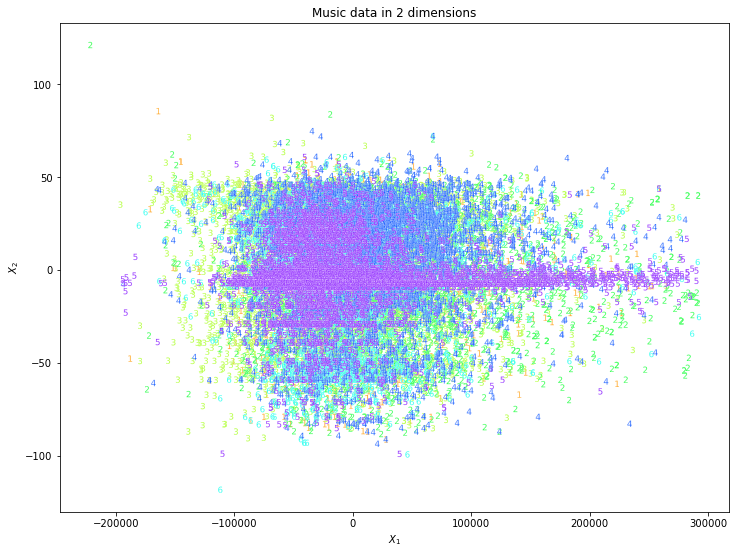

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns
import pylab as pl

music = spotify[music_covariates] #subset for music covariates only

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(music_X)
music_2dim = pd.DataFrame(data=principalComponents)

# Plot digits in 2D:
markers = ["$1$", "$3$", "$2$", "$6$", "$4$", "$5$"]

plt.figure(figsize=(12, 9))
sns.scatterplot(
    x=music_2dim[0],
    y=music_2dim[1],
    style=music_Y,
    hue=music_Y,
    edgecolor="white",
    palette="gist_rainbow",
    linewidth=0.2,
    markers=markers,
    s=40,
    legend=False,
).set_title("Music data in 2 dimensions")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

This tells us the categories overlap a lot! Which means its hard to classify :)

In [20]:
genres = ["pop", "rap", "edm", "rock", "latin", "r&b"]


medians = { "pop": [], "rap": [], "edm": [], "rock":[], "latin":[], "r&b":[]}

In [21]:
import numpy as np

for i in genres:
    for j in music_covariates:
        medians[i].append(np.median(spotify.loc[spotify['playlist_genre']==i][j]))

In [72]:
df = pd.DataFrame(medians)
df = df.transpose()


normalized_df=(df-df.min())/(df.max()-df.min())*100
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11
pop,60.280374,55.982906,0.0,64.457096,NaN,5.235988,39.396019,0.273183,15.789474,50.387597,61.560725,21.121640
rap,100.000000,29.487179,100.0,37.108581,NaN,100.000000,61.564859,0.000000,42.105263,56.976744,61.399629,20.279814
edm,63.551402,100.000000,100.0,100.000000,NaN,13.274336,0.000000,100.000000,100.000000,0.000000,100.000000,0.000000
rock,0.000000,76.495726,0.0,16.795445,NaN,0.000000,12.354152,5.288221,84.210526,62.403101,83.502621,100.000000
latin,96.261682,56.837607,100.0,67.832452,NaN,18.805310,82.155113,0.059398,5.263158,100.000000,12.112276,20.114429
r&b,77.570093,0.000000,100.0,0.000000,NaN,19.174041,100.000000,0.114536,0.000000,66.666667,0.000000,83.875678


In [81]:
normalized_df.iloc[1].to_list()

[100.0,
 29.487179487179517,
 100.0,
 37.10858072387148,
 nan,
 100.0,
 61.56485929993137,
 0.0,
 42.10526315789473,
 56.97674418604651,
 61.39962865880296,
 20.279814053280887]

In [84]:
import plotly.graph_objects as go

categories = genres

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=normalized_df[0].to_list(),
      theta=categories,
      fill='toself',
      name=genres[0]
))
fig.add_trace(go.Scatterpolar(
      r=normalized_df[1].to_list(),
      theta=categories,
      fill='toself',
      name=genres[1]
))

fig.add_trace(go.Scatterpolar(
      r=normalized_df[2].to_list(),
      theta=categories,
      fill='toself',
      name=genres[2]
))
fig.add_trace(go.Scatterpolar(
      r=normalized_df[3].to_list(),
      theta=categories,
      fill='toself',
      name=genres[3]
))
fig.add_trace(go.Scatterpolar(
      r=normalized_df[4].to_list(),
      theta=categories,
      fill='toself',
      name=genres[4]
))
fig.add_trace(go.Scatterpolar(
      r=normalized_df[5].to_list(),
      theta=categories,
      fill='toself',
      name=genres[5]
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=False
)

fig.show()